In [55]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from pre_processing import load_and_clean_data

In [56]:
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = load_and_clean_data("diabetes_prediction_dataset.csv", split=False)
feature_columns = df.drop("diabetes", axis=1).columns

In [63]:
X_val_df = pd.DataFrame(X_val, columns=feature_columns)

In [64]:
def rule_based_classifier(X):
    # Customize these thresholds as needed
    bmi_threshold = 30        # Obesity threshold
    age_threshold = 50        # Age over 50
    smoke_columns = [col for col in X.columns if 'smoking_history' in col]
    
    # Predict 1 (diabetic) if any of these risk factors are met
    predictions = (
        (X["bmi"] > bmi_threshold) |
        (X["age"] > age_threshold) |
        (X["smoking_history"] == "Other")
    ).astype(int)
    
    return predictions

In [65]:
print("Rule-Based Classifier Report:")
print(classification_report(y_val, y_pred_rules, digits=4))

Rule-Based Classifier Report:
              precision    recall  f1-score   support

           0     0.9543    0.3523    0.5147      8767
           1     0.1098    0.8255    0.1937       848

    accuracy                         0.3941      9615
   macro avg     0.5320    0.5889    0.3542      9615
weighted avg     0.8798    0.3941    0.4864      9615



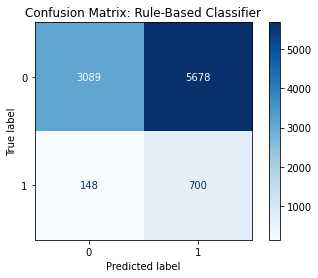

In [66]:
cm = confusion_matrix(y_val, y_pred_rules)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Rule-Based Classifier")
plt.show()